In [8]:
%%px
import yt
from matplotlib import rc_context
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib

%px:   0%|          | 0/48 [00:00<?, ?tasks/s]

In [4]:
# In a new notebook cell
import ipyparallel as ipp

# Connect to the running cluster of engines
rc = ipp.Client()

# Create a "direct view" to control all engines at once
dview = rc[:]

# Make cells wait for the parallel job to finish before continuing
dview.block = True

print(f"Successfully connected to {len(rc.ids)} MPI engines.")

Successfully connected to 48 MPI engines.


In [10]:
# List directory to check access

!pwd


/home1/10334/jthsu2001/shearstream


In [17]:
frame = "21"
print(f"Loading frame {frame:0>4}...")

Loading frame 0021...


In [ ]:
# Self defined fields
def _log_relative_density(field, data):
    return np.log(data[('gas', 'density')] / (1.0037999999999999e-26 * yt.units.gram / yt.units.cm**3))  # Density of stream in cgs

yt.add_field(('gas', 'log_relative_density'), function=_log_relative_density, units="", display_name="Log Relative Density", sampling_type="cell", force_override=True)

In [11]:
%%px

frame = "100"
frame_string = f"{frame:0>4}"
# Load the dataset with the specified frame number prepended by zeros to ensure four digits
ds = yt.load(f"/scratch/10334/jthsu2001/enzo_output/KH-{frame_string}/KH-{frame_string}.block_list")  
ds.index
ds.field_list
ds.derived_field_list

[stderr:21] yt : [INFO     ] 2025-09-22 21:50:14,241 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,246 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7878.75it/s] 


[stderr:27] yt : [INFO     ] 2025-09-22 21:50:14,242 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,242 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,243 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,244 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,245 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7230.28it/s]


[stderr:2] yt : [INFO     ] 2025-09-22 21:50:14,249 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7818.61it/s] 


[stderr:7] yt : [INFO     ] 2025-09-22 21:50:14,249 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7896.54it/s] 


[stderr:43] yt : [INFO     ] 2025-09-22 21:50:14,249 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7517.71it/s]


[stderr:46] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7403.81it/s] 


[stderr:13] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7453.47it/s]


[stderr:25] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7697.54it/s] 


[stderr:24] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7807.28it/s] 


[stderr:32] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7746.05it/s] 


[stderr:41] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7402.38it/s]


[stderr:45] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7828.91it/s] 


[stderr:8] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7310.94it/s]


[stderr:5] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7598.63it/s] 


[stderr:19] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7293.97it/s] 


[stderr:30] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7620.79it/s] 


[stderr:6] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7448.27it/s] 


[stderr:12] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7270.94it/s]


[stderr:26] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7488.74it/s] 


[stderr:17] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 6669.44it/s]


[stderr:16] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 8075.33it/s] 


[stderr:34] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7272.60it/s]


[stderr:10] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7596.39it/s] 


[stderr:40] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7962.09it/s] 


[stderr:14] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 8005.55it/s] 


[stderr:35] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7777.39it/s] 


[stderr:0] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7700.07it/s] 


[stderr:38] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7466.61it/s] 


[stderr:33] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7657.97it/s] 


[stderr:11] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7628.60it/s] 


[stderr:44] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 8016.61it/s] 


[stderr:28] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7580.24it/s] 


[stderr:36] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 6832.25it/s]


[stderr:23] yt : [INFO     ] 2025-09-22 21:50:14,250 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7915.86it/s] 


[stderr:31] yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7722.33it/s] 


[stderr:22] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7334.08it/s]


[stderr:20] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7380.66it/s] 


[stderr:18] yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7304.84it/s]


[stderr:37] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7412.34it/s]


[stderr:9] yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7644.07it/s] 


[stderr:29] yt : [INFO     ] 2025-09-22 21:50:14,251 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7507.71it/s] 


[stderr:39] yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,257 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 6998.45it/s]


[stderr:3] yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7664.38it/s]


[stderr:4] yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,257 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,258 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 8120.54it/s] 


[stderr:42] yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,258 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7282.59it/s]


[stderr:47] yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,257 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,258 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7357.51it/s]


[stderr:1] yt : [INFO     ] 2025-09-22 21:50:14,252 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,254 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,257 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7947.17it/s] 


[stderr:15] yt : [INFO     ] 2025-09-22 21:50:14,253 Parameters: current_time              = 300.0
yt : [INFO     ] 2025-09-22 21:50:14,255 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2025-09-22 21:50:14,256 Parameters: domain_left_edge          = [-16. -16. -16.]
yt : [INFO     ] 2025-09-22 21:50:14,257 Parameters: domain_right_edge         = [16. 16. 16.]
yt : [INFO     ] 2025-09-22 21:50:14,258 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 32768/32768 [00:04<00:00, 7797.19it/s] 


%px:   0%|          | 0/48 [00:00<?, ?tasks/s]

Out[4:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'de

Out[16:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[44:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[14:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[40:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[1:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'de

Out[7:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'de

Out[23:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[45:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[21:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[24:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[35:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[2:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'de

Out[15:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[33:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[32:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[0:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'de

Out[31:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[30:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[28:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[25:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[10:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[9:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'de

Out[3:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'de

Out[11:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[5:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'de

Out[26:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[29:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[46:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[43:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[41:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[38:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[13:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[6:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'de

Out[47:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[8:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'de

Out[37:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[20:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[19:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[18:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[22:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[34:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[12:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[42:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[27:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[39:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[36:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

Out[17:4]: 
[('enzoe', 'cell_volume'),
 ('enzoe', 'density'),
 ('enzoe', 'dx'),
 ('enzoe', 'dy'),
 ('enzoe', 'dz'),
 ('enzoe', 'path_element_x'),
 ('enzoe', 'path_element_y'),
 ('enzoe', 'path_element_z'),
 ('enzoe', 'total_energy'),
 ('enzoe', 'velocity_x'),
 ('enzoe', 'velocity_y'),
 ('enzoe', 'velocity_z'),
 ('enzoe', 'volume'),
 ('enzoe', 'x'),
 ('enzoe', 'y'),
 ('enzoe', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'd

In [12]:
%%px

# Density of stream in cgs
rho_s = 1.0037999999999999e-26

# Field to plot
field = ('gas', 'density')
plot = yt.ProjectionPlot(ds, 'z', field, center='c', buff_size=(512, 512), weight_field=None)
plot.set_cmap(field, 'RdBu')
plot.set_zlim(field, zmin='min', zmax='max')
# plot.set_log(field, False)

# Save the plot
plot.show()

%px:   0%|          | 0/48 [00:00<?, ?tasks/s]

Received Keyboard Interrupt. Sending signal SIGINT to engines...


yt : [INFO     ] 2025-09-15 15:44:08,122 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-09-15 15:44:08,122 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2025-09-15 15:44:08,122 Parameters: domain_left_edge          = [-4. -2. -2.]
yt : [INFO     ] 2025-09-15 15:44:08,123 Parameters: domain_right_edge         = [4. 2. 2.]
yt : [INFO     ] 2025-09-15 15:44:08,123 Parameters: cosmological_simulation   = 0
Parsing Hierarchy: 100%|██████████| 16/16 [00:00<00:00, 12393.14it/s]
yt : [INFO     ] 2025-09-15 15:44:08,584 Parameters: current_time              = 0.05287094304434423
yt : [INFO     ] 2025-09-15 15:44:08,584 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2025-09-15 15:44:08,585 Parameters: domain_left_edge          = [-4. -2. -2.]
yt : [INFO     ] 2025-09-15 15:44:08,585 Parameters: domain_right_edge         = [4. 2. 2.]
yt : [INFO     ] 2025-09-15 15:44:08,585 Parameters: cosmological_simulation   = 0
Parsing Hierar

Text(0.5, 0, 'Timestep')

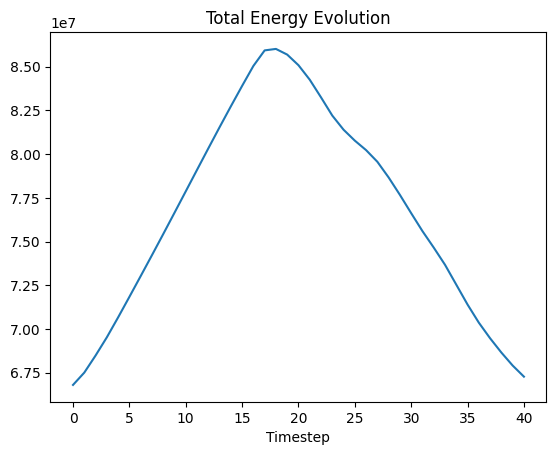

In [49]:
# Total energy evolution
energy = []
for i in range(len(ds)):
    ad = ds[i].all_data()
    energy.append(ad.quantities.total_quantity('total_energy').value)


Text(0.5, 0, 'Timestep')

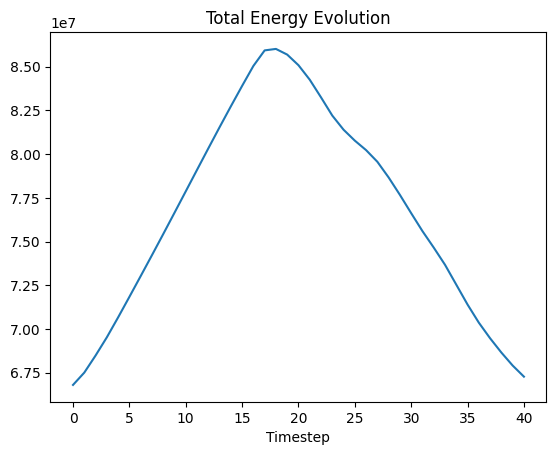

In [50]:
plt.plot(energy)
plt.title('Total Energy Evolution')
plt.xlabel('Timestep')

In [55]:
L = 3.0856775809623245E21 #code length in cm
W = 2.95008790162128e+36 #code mass in g
T = 2.148989753079474e14 #code time in s
mu = 0.6 #molecular weight 
mH = 1.673e-24 #hydrogen mass in g
n = 0.01 #number density in cm^-3
kB = 1.38e-16 #boltzmann constant in cgs
gamma = 5/3 #adiabatic index

p = (0.01 * kB * 1.5e4 * L / W) * T**2 #pressure in code units
rho = (n * mu * mH * L**3 / W) #density in code units

sound_speed = np.sqrt(gamma * p / (rho)) #in code units
print("Sound speed in code units:", sound_speed)
rho * kB * 1.5e4 / (mu * mH) / ((L**2) / T**2) #pressure in code units
sound_crossing_time = 6 / sound_speed #in code units
print("Sound crossing time in code units:", sound_crossing_time)

n * mu * mH

Sound speed in code units: 0.1291129343317914
Sound crossing time in code units: 46.470944456899566


1.0037999999999999e-26

In [65]:
first = yt.load('first.athdf', units_override=unit_base)
last = yt.load('last.athdf', units_override=unit_base)

# Calculates total internal energy and kinetic energy
def calc_energy(ds):
    data = ds.all_data()
    u = data['athena_pp', 'press']/(5/3-1)
    ke = 0.5 * (data['athena_pp', 'vel1']**2 + data['athena_pp', 'vel2']**2 + data['athena_pp', 'vel3']**2) * data['athena_pp', 'rho']
    return np.sum(u), np.sum(ke)
energy_first = calc_energy(first)
energy_last = calc_energy(last)
# Print in scientific notation
print(f'First-> Thermal:{energy_first[0].v:.2e} Kinetic:{energy_first[1].v:.2e} Total:{energy_first[0].v+energy_first[1].v:.2e}')
print(f'Last-> Thermal:{energy_last[0].v:.2e} Kinetic:{energy_last[1].v:.2e} Total:{energy_last[0].v+energy_last[1].v:.2e}')


yt : [WARNING  ] 2024-11-15 12:05:37,988 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-11-15 12:05:37,989 Overriding length_unit: 1e+18 cm.
yt : [INFO     ] 2024-11-15 12:05:37,989 Overriding time_unit: 10000000000.0 s.
yt : [INFO     ] 2024-11-15 12:05:37,990 Overriding mass_unit: 1e+26 g.
yt : [WARNING  ] 2024-11-15 12:05:37,990 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-11-15 12:05:38,016 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-11-15 12:05:38,017 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2024-11-15 12:05:38,017 Parameters: domain_left_edge          = [-36. -18. -18.]
yt : [INFO     ] 2024-11-15 12:05:38,017 Parameters: domain_right_edge         = [36. 18. 18.]
yt : [INFO     ] 2024-11-15 12:05:38,018 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-11-15 12:05:38,026 Overriding code units: Use this option only if you kno

First-> Thermal:2.20e+07 Kinetic:4.50e+07 Total:6.70e+07
Last-> Thermal:2.91e+07 Kinetic:3.79e+07 Total:6.70e+07


In [3]:
slc = ds.slice('z', 0)
slc['athena_pp', 'rho'].d
plt.imshow(slc['athena_pp', 'rho'].d.reshape(1024, 2048))
plt.show()
plt.imshow(frb['athena_pp', 'rho'].d)
plt.show()
print(slc.get_data(fields=('athena_pp', 'rho')))
# frb['density'].d.shape

2024-10-12 19:46:47.703 python[43521:3607665] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-12 19:46:47.703 python[43521:3607665] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


NameError: name 'frb' is not defined

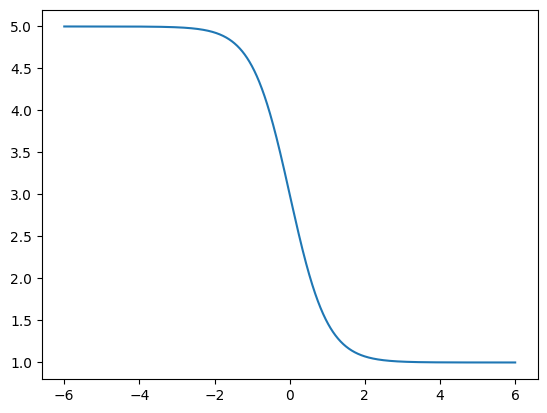

In [63]:
x = np.linspace(-6, 6, 2048)
contrast = 5
plt.plot(x, -np.tanh(x) * ((contrast-1) / 2) + ((contrast - 1) / 2 + 1) )

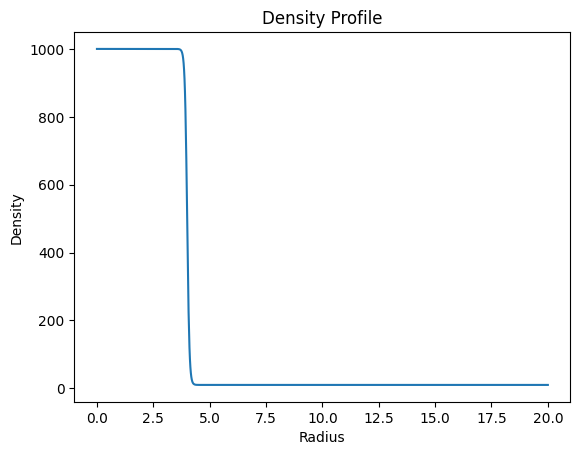

np.float64(1000.0)

In [3]:
n_e = 1.e-4
mu_e = 1.166667
m_H = 1.673534e-24
rho_0 = n_e * mu_e * m_H
density_contrast = 100
smoothing_thickness = 0.1
# rho_0 = 1e-24
r = np.linspace(0, 20, 1000)
radius = 4

rho_0 = 10

def density(r):
    # return rho_0 * (-np.tanh((r-radius)/smoothing_thickness) * ((density_contrast-1) / 2) + ((density_contrast - 1) / 2 + 1) )
    return rho_0 * ((density_contrast / 2) + 0.5 +
                                 (density_contrast - 1.0) * 0.5 * -np.tanh((r - radius) / smoothing_thickness))

plt.title("Density Profile")
plt.xlabel("Radius")
plt.ylabel("Density")
plt.plot(r, density(r))
# plt.ylim(1e-28, 1e-25)
plt.show() 
density(0) / density(20)
density(0)

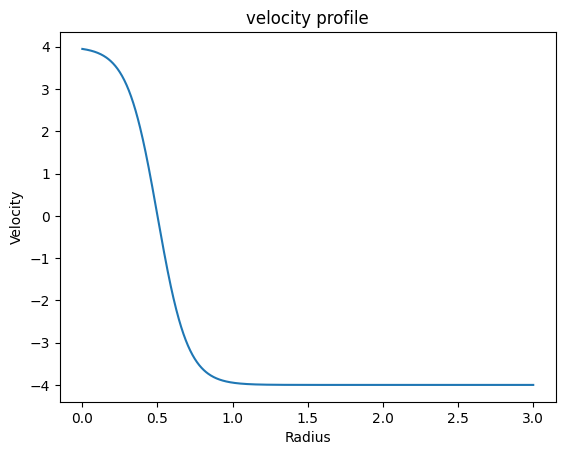

In [15]:
vel_shear = 4
smoothing_thickness_vel = 0.2

def velocity(r):
    return vel_shear * -1 * (np.tanh((r-radius)/smoothing_thickness_vel) )


plt.title("velocity profile")
plt.xlabel("Radius")
plt.ylabel("Velocity")
plt.plot(r, velocity(r))

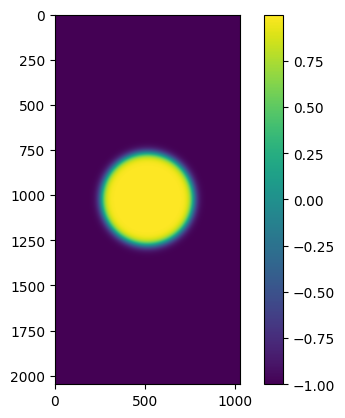

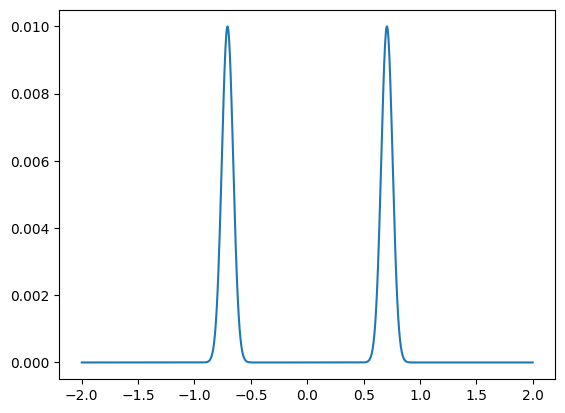

In [8]:
x = np.linspace(-4, 4, 2048)
y = np.linspace(-2, 2, 1024)
z = np.linspace(-2, 2, 1024)
vel_shear = 1
radius = 1
smoothing_thickness_vel = 0.1


vel_x = vel_shear * -1 * (np.tanh((np.sqrt(x[:, None]**2 + y[None, :]**2)-radius)/smoothing_thickness_vel) )
plt.imshow(vel_x)
plt.colorbar()
plt.show()

vel_y = 0.01 * np.exp(-1 * np.power((np.sqrt(y*y + z*z) - radius) / smoothing_thickness_vel, 2))
plt.plot(y, vel_y)
plt.show()

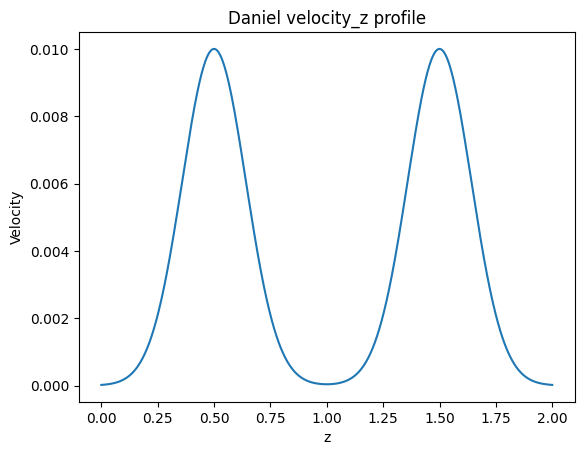

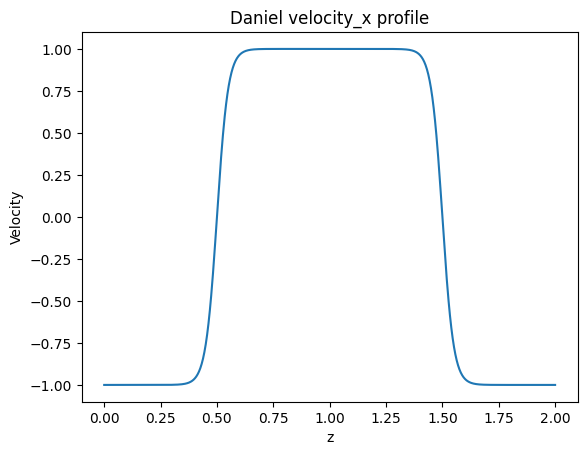

In [5]:
z = np.linspace(0, 2, 1000)
z1 = 0.5
z2 = 1.5
A = 0.01
x = 0.25
pert = A*np.sin(2*np.pi*x)
sigma = 0.2
a = 0.05
u_flow = 1

def vel_x(z):
    return u_flow * (np.tanh((z-z1)/a) - np.tanh((z-z2)/a) - 1)

def vel_z(z):
    return pert * (np.exp(-((z-z1)/sigma)**2)+np.exp(-((z-z2)/sigma)**2))

plt.title("Daniel velocity_z profile")
plt.xlabel("z")
plt.ylabel("Velocity")
plt.plot(z, vel_z(z))
plt.show()

plt.title("Daniel velocity_x profile")
plt.xlabel("z")
plt.ylabel("Velocity")
plt.plot(z, vel_x(z))
plt.show()

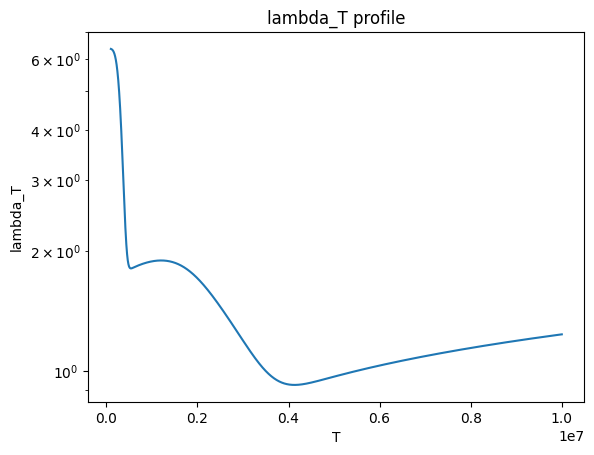

In [2]:
T_cold = 0.1
T_hot = 10
T = np.linspace(1e5, 1e7, 10000)
def Lambda_cool(temperature):
    Lambda = 4.7 * np.exp(-1 * np.pow(temperature / 3.5e5, 4.5))
    Lambda += 0.313 * np.pow(temperature, 0.08) * np.exp(-1 * np.pow(temperature / 3e6, 4.4))
    Lambda += 6.42 * np.pow(temperature, -0.2) * np.exp(-1 * np.pow(temperature / 2.1e6, 4.4))
    Lambda += 0.00439 * np.pow(temperature, 0.35)
    # Lambda *= 1e-22 
    return Lambda

plt.title("lambda_T profile")
plt.xlabel("T")
plt.ylabel("lambda_T")
plt.plot(T, Lambda_cool(T))
plt.yscale('log')
plt.show()
# lambda_T(0.1)

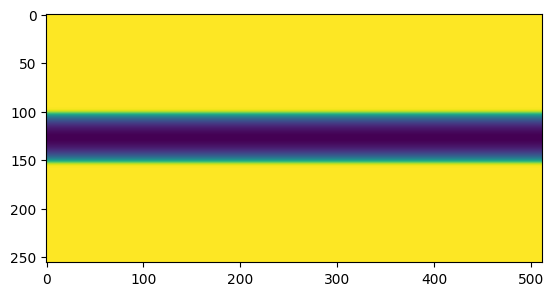

578195798.2671205 460847721.4185448


In [6]:
frame = np.load("../kh_updated/kh_custom.out1.00000.athdf.npy")
plt.imshow(frame)
plt.show()
print(np.max(frame), np.min(frame))